In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from datetime import datetime
import pickle
from comparers import ModelComparer
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from IPython.display import display
from sklearn.metrics import classification_report
from comparers import ModelComparer, plot_decision_boundary
from util import RuleClassifier, find_counterfactuals, counterfactuals_to_constraint_matrix, get_complexity,\
                 group_metrics
from surrogate_tree import train_surrogate_tree, plot_surrogate_tree,\
                 get_feature_importances, plot_feature_importances, plot_tree_leafs_for_class,\
                 tree_to_constraint_matrix, extract_rules, print_rules,\
                 get_pruned_trees, eval_trees
from tasks.boston_housing import make_task4 as make_task

In [2]:
clf_a, clf_b, X, y, feature_names, categorical_features, feature_precisions = make_task()
comparer = ModelComparer(clf_a, clf_b, feature_names)

Trying to unpickle estimator LabelBinarizer from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator MLPClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.


In [3]:
mclass_diff = comparer.predict_mclass_diff(X)

# Explanations

In [4]:
%%time
trees = []
full_tree = train_surrogate_tree(X, mclass_diff)
trees = get_pruned_trees(full_tree, X, mclass_diff)
tree_it = iter(trees)
len(trees)

CPU times: user 56.1 ms, sys: 3.18 ms, total: 59.3 ms
Wall time: 69.6 ms


17

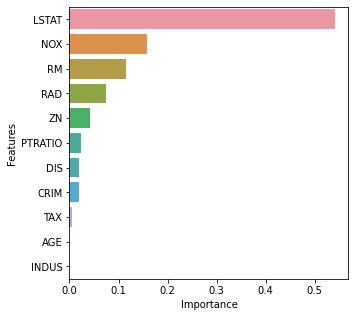

In [5]:
feature_importances, feature_order = get_feature_importances(trees[-1])
plot_feature_importances(feature_names, feature_importances, feature_order, figsize=(5, 5))

## 2 Leafs

In [5]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.1069887228423814, 1, 2)

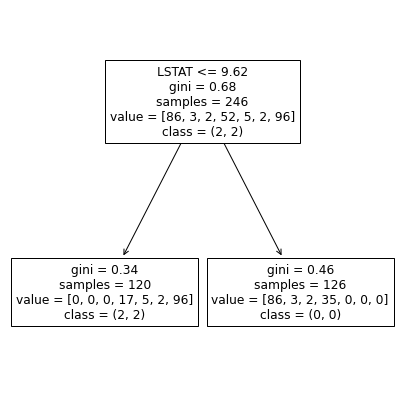

In [7]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [8]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

## 3 Leafs

In [9]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.05805309747551987, 2, 3)

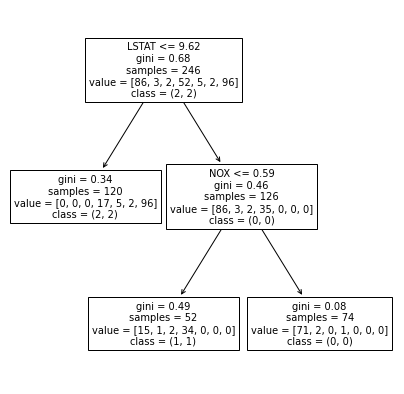

In [11]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [12]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

## 4 Leafs

In [13]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.051959558057119035, 2, 4)

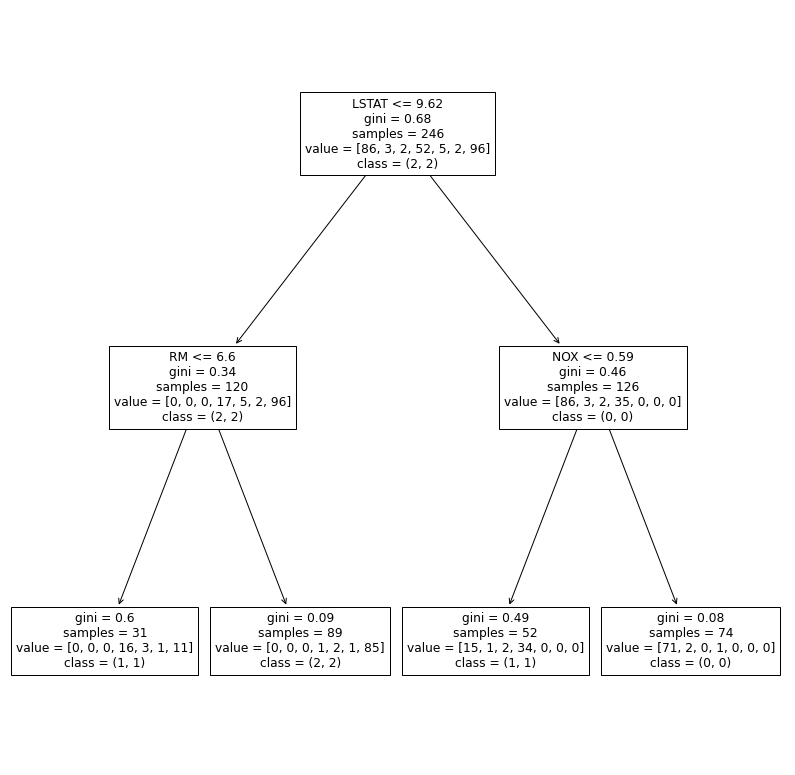

In [15]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [16]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

## 5 Leafs

In [17]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.047277089918607164, 3, 5)

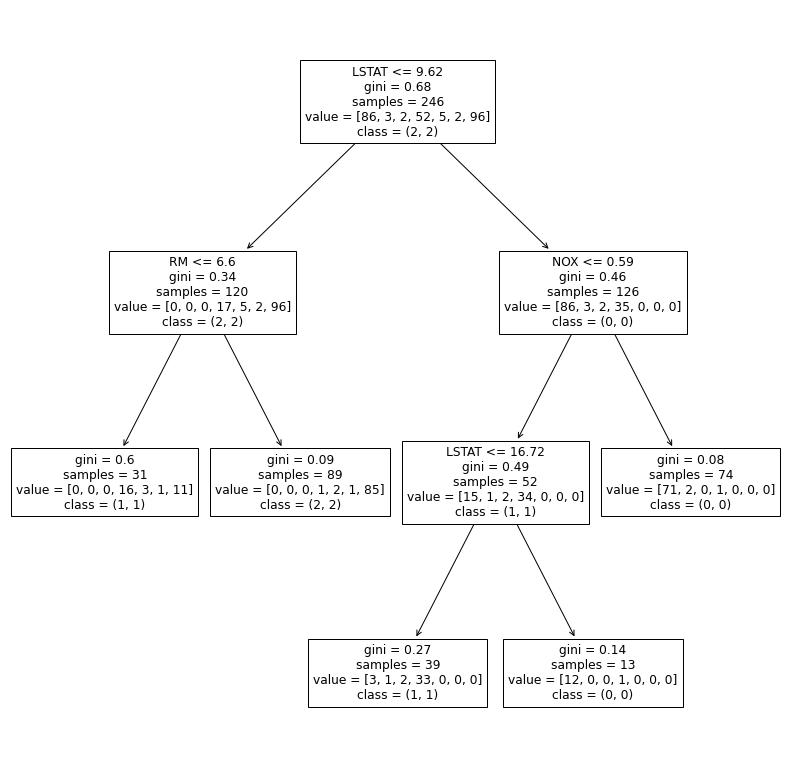

In [19]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [20]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

## 6 Leafs

In [21]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.020539152759948654, 3, 6)

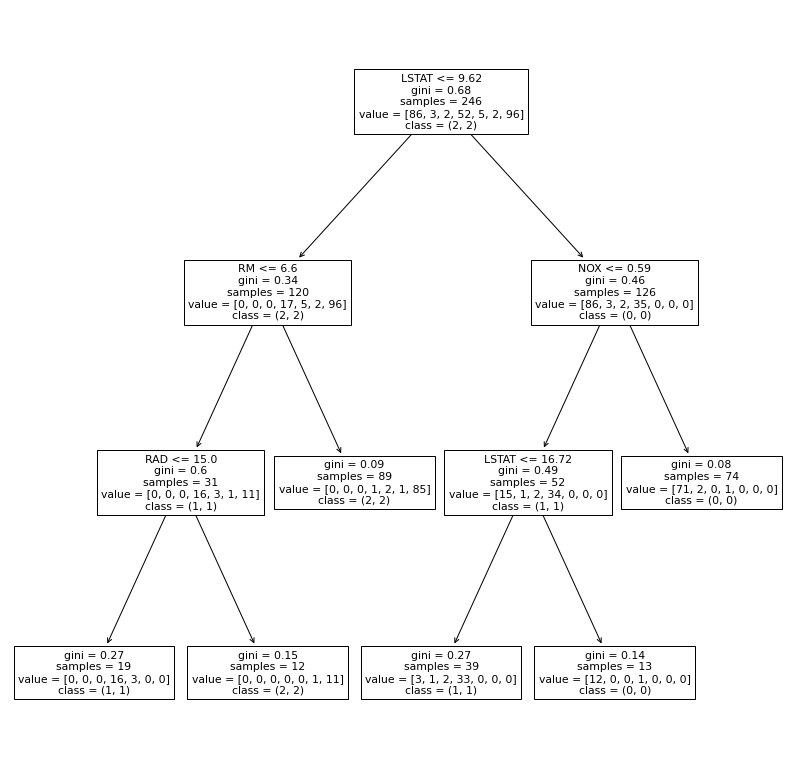

In [23]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [24]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

## 7 Leafs

In [25]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.013465623221720777, 4, 7)

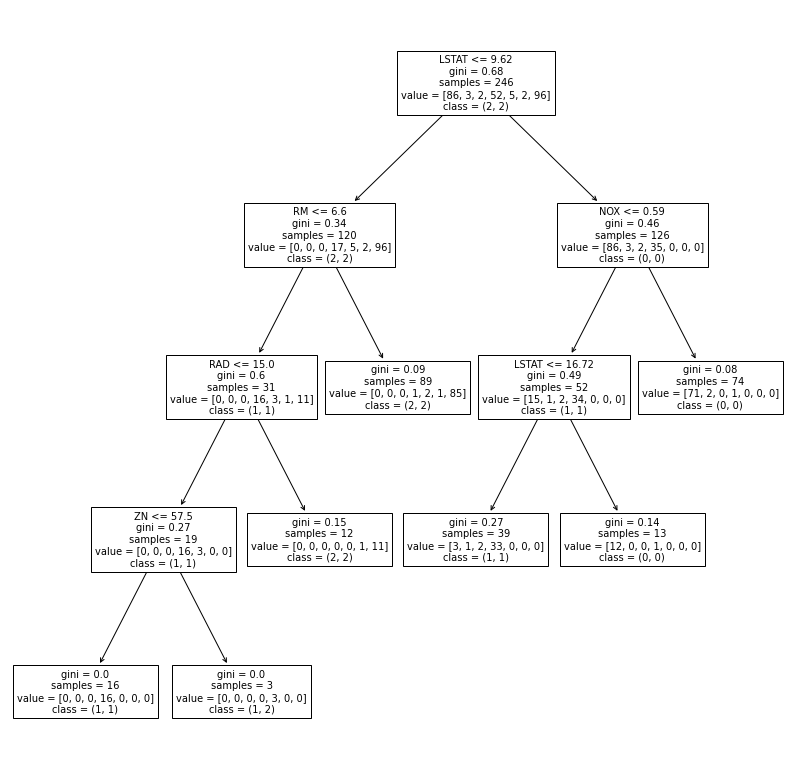

In [27]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [28]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. ZN > 57.5 and RM <= 6.5975000858306885 and RAD <= 15.0 and LSTAT <= 9.619999885559082 => (1, 2) [0, 0, 0, 0, 3, 0, 0]


## 8 Leafs

In [29]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.011470628073192785, 4, 8)

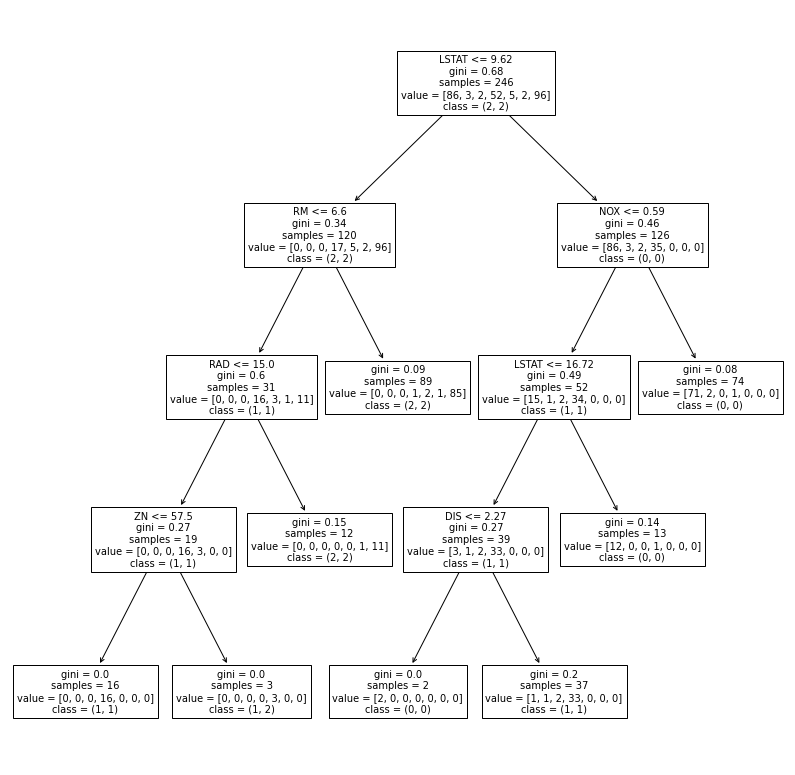

In [31]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [32]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. ZN > 57.5 and RM <= 6.5975000858306885 and RAD <= 15.0 and LSTAT <= 9.619999885559082 => (1, 2) [0, 0, 0, 0, 3, 0, 0]


## 9 Leafs

In [33]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.009140417318322637, 4, 9)

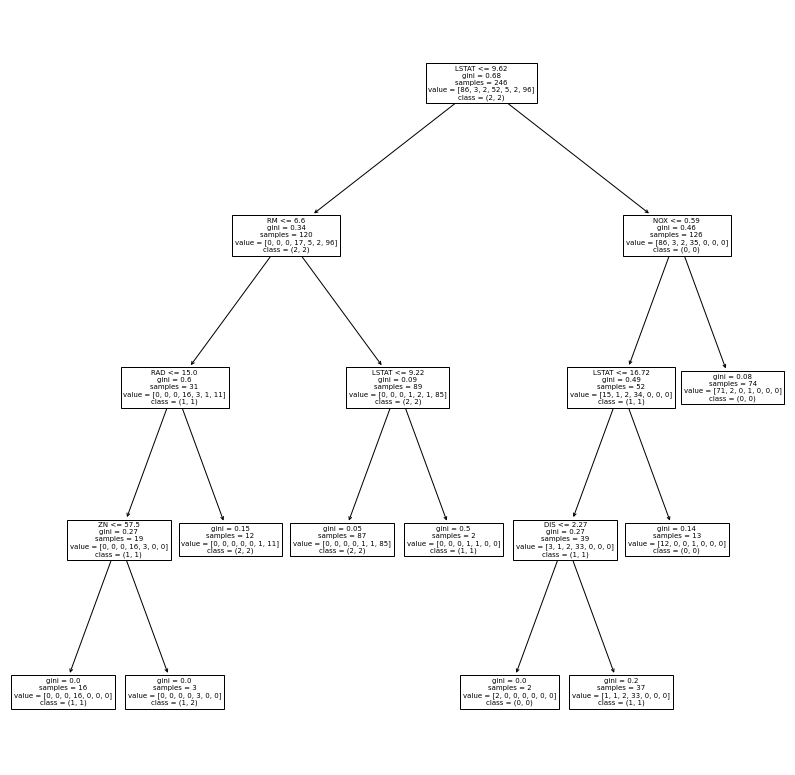

In [35]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [36]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. ZN > 57.5 and RM <= 6.5975000858306885 and RAD <= 15.0 and LSTAT <= 9.619999885559082 => (1, 2) [0, 0, 0, 0, 3, 0, 0]


## 10 Leafs

In [37]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.007989907485281748, 5, 10)

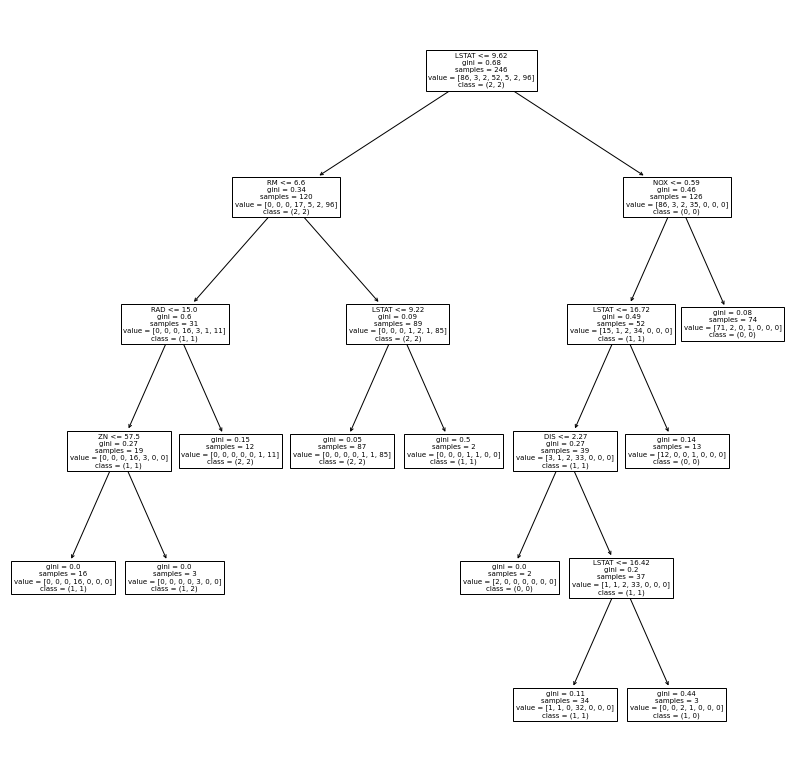

In [39]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [40]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. NOX <= 0.5909999907016754 and DIS > 2.271081805229187 and 16.423087120056152 < LSTAT <= 16.715493202209473 => (1, 0) [0, 0, 2, 1, 0, 0, 0]
2. ZN > 57.5 and RM <= 6.5975000858306885 and RAD <= 15.0 and LSTAT <= 9.619999885559082 => (1, 2) [0, 0, 0, 0, 3, 0, 0]


## 12 Leafs

In [41]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.007695132486311929, 5, 12)

In [43]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. NOX <= 0.5909999907016754 and DIS > 2.271081805229187 and 16.423087120056152 < LSTAT <= 16.715493202209473 => (1, 0) [0, 0, 2, 1, 0, 0, 0]
2. ZN > 57.5 and RM <= 6.5975000858306885 and RAD <= 15.0 and LSTAT <= 9.619999885559082 => (1, 2) [0, 0, 0, 0, 3, 0, 0]
3. RM > 6.5975000858306885 and PTRATIO > 20.600000381469727 and LSTAT <= 9.21500015258789 => (2, 1) [0, 0, 0, 0, 0, 1, 0]
4. CRIM <= 0.01169000007212162 and RM > 6.5975000858306885 and PTRATIO <= 20.600000381469727 and LSTAT <= 9.21500015258789 => (1, 2) [0, 0, 0, 0, 1, 0, 0]


# Evaluation

In [ ]:
# TODO